# LOAN STATUS PREDICTION

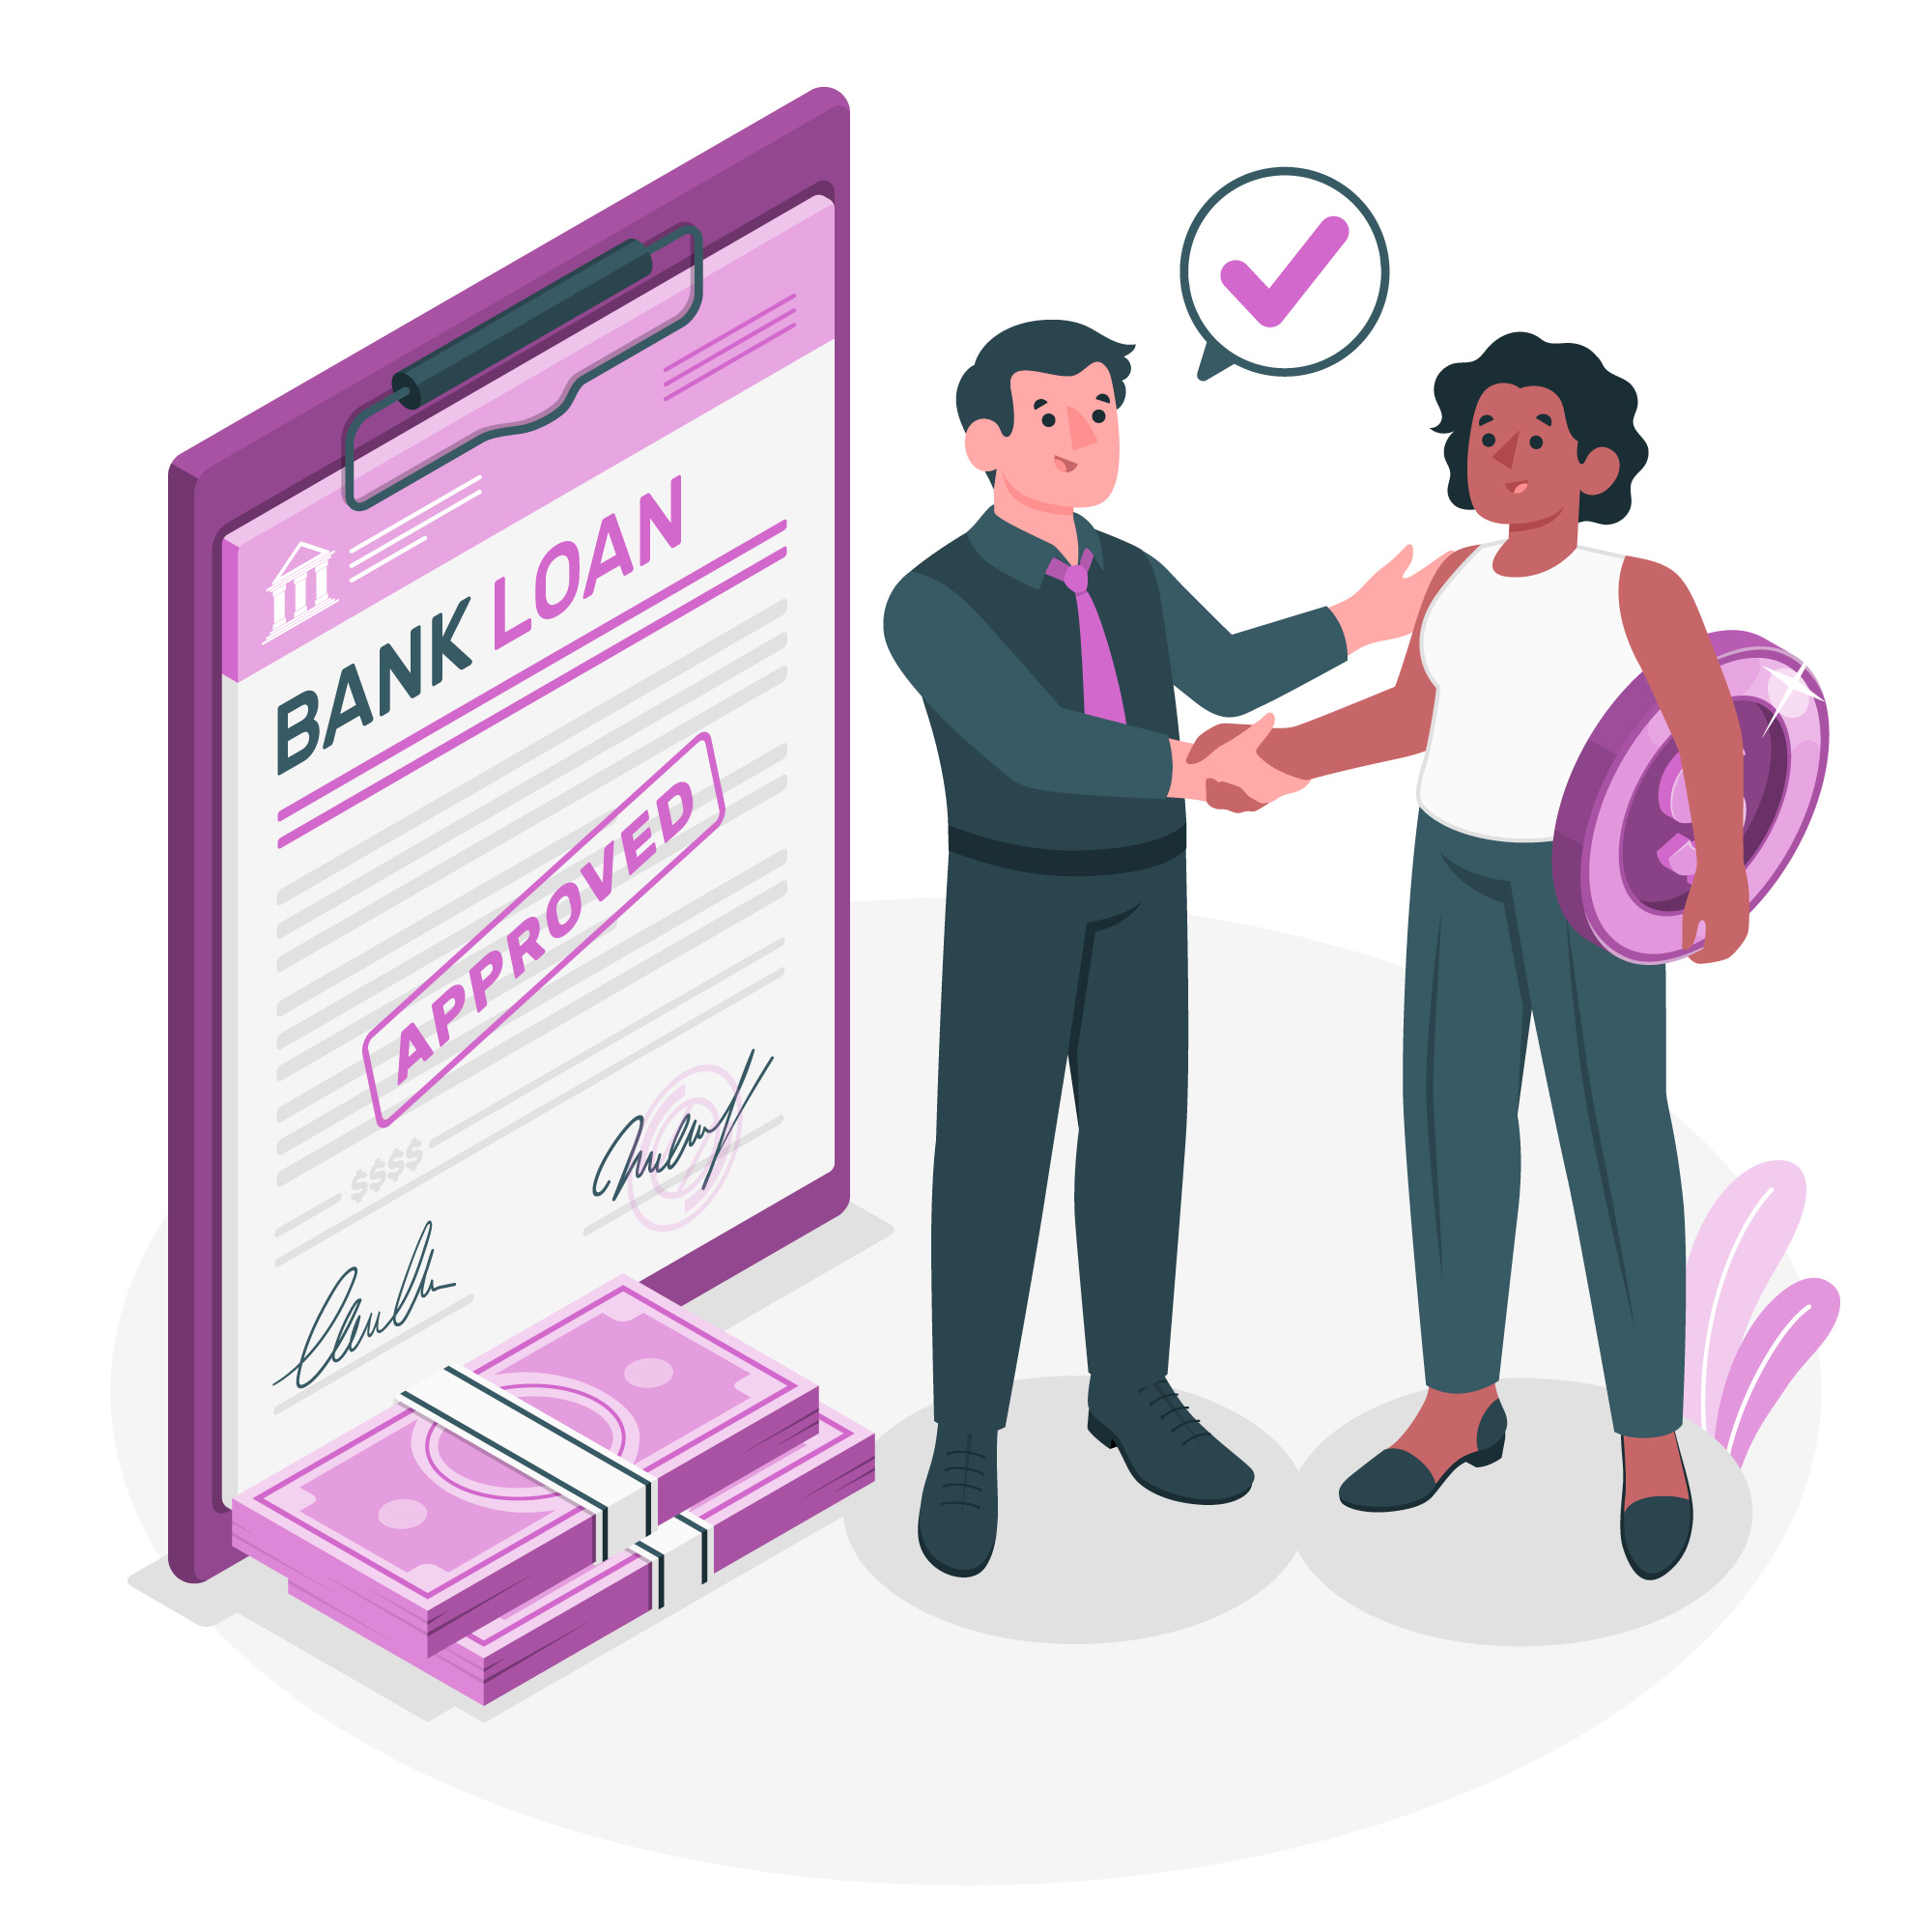

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='loan.JPG',height=400,width=600))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\jhonn\Downloads\sinsagar program\loan_prediction.csv.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


 Loan_ID : Unique Loan ID
 
 Gender : Male/ Female

 Married : Applicant married (Y/N)

 Dependents : Number of dependents

 Education : Applicant Education (Graduate/ Under Graduate)

 Self_Employed : Self employed (Y/N)

 ApplicantIncome : Applicant income

 CoapplicantIncome : Coapplicant income

 LoanAmount : Loan amount in thousands of dollars

 Loan_Amount_Term : Term of loan in months

 Credit_History : Credit history meets guidelines yes or no

 Property_Area : Urban/ Semi Urban/ Rural

 Loan_Status : Loan approved (Y/N) this is the target variable

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data = data.drop('Loan_ID',axis=1)

In [12]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
data = data.dropna(subset=columns)

In [15]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data['Self_Employed'].mode()[0]

'No'

In [17]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data['Credit_History'].mode()[0]

1.0

In [22]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [23]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###  Handling Categorical Columns

In [24]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
469,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
456,Male,Yes,0,Graduate,No,4301,0.0,118.0,360.0,1.0,Urban,Y
308,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,1.0,Urban,Y
380,Male,Yes,0,Graduate,No,3333,2500.0,128.0,360.0,1.0,Semiurban,Y


In [25]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [26]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [27]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [29]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


###  Splitting X and y

In [30]:
X = data.drop('Loan_Status',axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [31]:
y = data['Loan_Status']

In [32]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

###  Feature Scaling

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [34]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [35]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [36]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


In [37]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

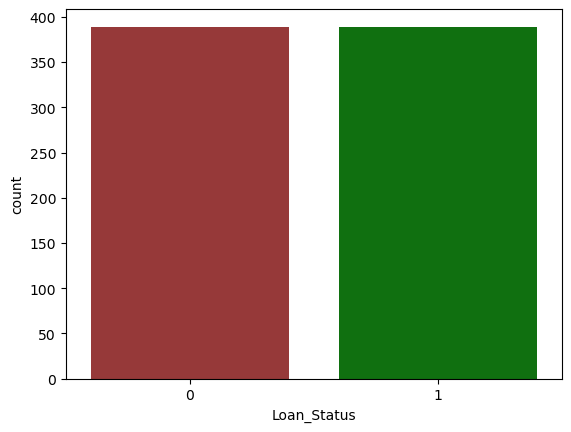

In [38]:
colors = ["brown", "green"]
sns.countplot(x=y_resample,palette=colors)
plt.show

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)

In [41]:
xtrain

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
694,1,0,0.0,1,0,-0.486560,-0.545638,-0.669986,2.112129,0.810275,2
638,0,0,0.165485,1,0,-0.174233,-0.545638,-0.465989,0.279961,1.000000,2
133,1,0,0.0,1,0,0.640262,-0.545638,1.166979,0.279961,1.000000,1
355,1,1,0.0,1,0,-0.388759,-0.065814,-0.607338,0.279961,1.000000,1
55,1,1,0.0,0,1,-0.459900,0.588642,0.226234,-2.468292,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0.0,1,0,-0.252351,-0.545638,-0.416807,0.279961,1.000000,2
106,1,1,2.0,1,0,-0.401511,-0.545638,-0.774052,0.279961,1.000000,2
270,1,1,0.0,0,0,-0.595637,0.419273,-0.631154,0.279961,0.000000,1
435,1,1,1.0,0,0,-0.569127,0.255494,-0.178644,0.279961,1.000000,0


In [42]:
xtest

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
595,1,1,0.890426,0,1,0.720953,0.706069,0.173217,-2.468292,0.00000,0
587,0,0,0.0,1,0,-0.286529,-0.545638,-0.183743,0.279961,1.00000,0
543,1,0,0.0,1,0,-0.280874,0.868841,0.309591,0.279961,1.00000,0
644,1,1,4.0,1,0,-0.171705,2.254682,2.240754,0.279961,0.78453,2
487,0,1,1.0,1,0,-0.124499,0.390003,-0.071471,-2.468292,1.00000,2
...,...,...,...,...,...,...,...,...,...,...,...
351,1,1,2.0,0,0,-0.563255,-0.011221,-0.392991,-2.468292,1.00000,2
79,1,1,0.0,1,0,0.057883,0.824772,0.345315,0.279961,1.00000,2
148,1,0,0.0,1,0,-0.522316,-0.545638,-0.988399,2.112129,0.00000,2
333,0,0,0.0,1,0,-0.433893,-0.065814,-0.428715,0.279961,1.00000,1


In [43]:
ytrain

694    0
638    0
133    0
355    1
55     0
      ..
71     1
106    1
270    0
435    1
102    0
Name: Loan_Status, Length: 622, dtype: int32

In [44]:
ytest

595    0
587    0
543    1
644    0
487    1
      ..
351    1
79     1
148    0
333    1
168    1
Name: Loan_Status, Length: 156, dtype: int32

###  SVC

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report
model = svm.SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.7115384615384616
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        76
           1       0.71      0.75      0.73        80

    accuracy                           0.71       156
   macro avg       0.71      0.71      0.71       156
weighted avg       0.71      0.71      0.71       156



###  Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
ypred1=model1.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(classification_report(ytest,ypred1))

0.7756410256410257
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        76
           1       0.81      0.74      0.77        80

    accuracy                           0.78       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.78      0.78      0.78       156



###  Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier()
model2.fit(xtrain,ytrain)
ypred2=model2.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(classification_report(ytest,ypred2))

0.8397435897435898
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.84      0.85      0.84        80

    accuracy                           0.84       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.84      0.84      0.84       156



In [48]:
import joblib

In [49]:
joblib.dump(model2,'loan_status_predict')

['loan_status_predict']

In [50]:
model = joblib.load('loan_status_predict')

In [51]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [53]:
result = model2.predict(df)

In [54]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [55]:
from tkinter import *
import joblib
import pandas as pd

In [58]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education [1:Graduate ,0:Non_Graduate]").grid(row=4)
Label(master,text = "Self_Employed [1:Yes ,0:No]").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area ['Rural':0,'Semiurban':2,'Urban':1]").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry,bg="green").grid()


mainloop()